In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

!pip install xgboost

In [2]:
housing = datasets.load_boston()
housing.keys()

hData= pd.DataFrame(housing['data'], columns=housing['feature_names'])


target=pd.DataFrame(housing['target'],columns=['Target'])

df = pd.concat([hData,target],axis=1)

df_corr=df.corr()

plot_cols=['Target','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:,plot_cols]

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1] =df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [23]:
#학습 데이터와 검증 데이터로 분할
X_data = df.loc[:,['LSTAT','RM']]
y_data = df.loc[:,'Target']

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=12)

In [24]:
#선형 회귀(베이스라인 모델)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
print("회귀 계수(기울기): ", lr.coef_)
print("상수항(절편) : ",lr.intercept_)

#저소득층은 음수, 방의개수는 양수

회귀 계수(기울기):  [-23.16742603  25.40485306]
상수항(절편) :  16.25726756065851


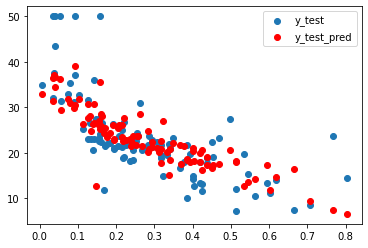

In [26]:
#예측
y_test_pred= lr.predict(X_test)

#예측값, 실제값 그림

plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, label='y_test_pred',c='r')

plt.legend()
plt.show()

In [27]:
#실제값과(정답) 예측값의 차이를 잔차(residuals)라고한다.
#모델 성능을 평가할 때 사용되는 수치화된 성능 지표
#MSE(Mean Squared Error) 잔차의 제곱을 평균한 값
#MAE (Mean Absolute Error) 잔차의 절대값을 평균한 값
#RMSE(Root Mean Squared Error) MSE의 제곱근

from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train)

train_mse=mean_squared_error(y_train,y_train_pred)
print("Train MSE: ",train_mse)

test_mse=mean_squared_error(y_test,y_test_pred) #실제 y값과 모델 예측 y값
print("Test MSE: ",test_mse)



Train MSE:  30.804233918828988
Test MSE:  29.506547336671154


In [ ]:
#과대적합overfitting & 과소적합underfitting

#과대적합 overfitting 모델이 학습에 사용한 데이터와 비슷한 데이터는 잘
#예측하지만 새로운 특성의 데이터에 대해서는 예측력이 떨어지는 현상
#추구공으로 학습 -> 축구공 잘 예측 -> 야구공(x), 탁구공(x)
#일반적으로 모델 구조가 복잡할수록 패턴을 잘 파악하는데 모델이 훈련 데이터에
#지나치게 적응하는 상황이 될 수 있다. 이런 경우 훈련데이터와 차이가 큰 새로운
#데이터에 대해서는 모델이 학습한 패턴으로는 잘 설명되지 않는 경우가 발생한다.

#과소적합 underfitting 훈련 데이터의 특성을 파악하기 충분하지 않을 정도로
#모델의 구성이 단순하거나 데이터의 수가 부족할 때 발생한다. 단순한 선형 함수로
#데이터 분포를 충분히 설명하지 못한다.

#모델의 예측력을 안정적으로 확보하려면 과대적합이나 과소적합이 아닌 중간 생태의
#균형점을 찾는 것이 중요하다.

In [28]:
#의사 결정 나무

#선형 회귀 모델에 비해 오차가 전반적으로 낮은 편이다.

from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(max_depth=3,random_state=12)
dtr.fit(X_train,y_train)


y_train_pred= dtr.predict(X_train)
train_mse=mean_squared_error(y_train,y_train_pred)
print("Train MSE: ",train_mse)

y_test_pred= dtr.predict(X_test)
test_mse=mean_squared_error(y_test,y_test_pred)
print("Test MSE: ",test_mse)



Train MSE:  18.802883869508115
Test MSE:  17.90648054574048


In [38]:
# XGBoost

from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : ", train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : ", test_mse)

# Train MSE 와 Test MSE 차이가 크면 과대적합으로 볼수 있다. 
# 데이터의 개수가 작기 때문에 XGBoost와 같이 복잡도가 높은 알고리즘은 쉽게
# 과적합될 위험성이 있다. XGBoost 알고리즘은 데이터의 개수가 많고 
# 모델 예측의 난이도가 높은 경우 탁월한 성능을 보인다.


Train MSE :  3.51759554074442
Test MSE :  20.206037959685645
